In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
input_path="C:\\Users\\Farima\\OneDrive\\Data\\PhD\\StackOverFlow-data\\Votes\\FinalCsvFiles\\Votes_2017_2020.csv"

In [7]:
data=pd.read_csv(input_path,names=["RowId","CreateDate","PostId","VoteType","UserId"])
data.head()

,RowId,CreateDate,PostId,VoteType,UserId
0,129325273,2017-01-01T00:00:00.000,2173777,2,-1
1,129325274,2017-01-01T00:00:00.000,33568015,2,-1
2,129325276,2017-01-01T00:00:00.000,11681331,2,-1
3,129325277,2017-01-01T00:00:00.000,25398100,2,-1
4,129325278,2017-01-01T00:00:00.000,41412391,2,-1


In [8]:
def getYearlyMonthlyCreation(data):
    data["CreateDate"] = pd.to_datetime(data["CreateDate"])
    print(data.head())
    data["CreateYear"]=data['CreateDate'].map(lambda x: x.year)
    print(data.head())
    data["CreateMonth"]=data['CreateDate'].map(lambda x: x.month)
    print(data.head())
    data["CreateYearMonth"]=data["CreateYear"].astype(str) +"-"+ data["CreateMonth"].astype(str)
    print(data.head())
    data['CreateYearMonth'] = pd.to_datetime(data['CreateYearMonth'])
    print(data.head())
    creation_yearly_monthly = pd.DataFrame(data[["RowId", "CreateYearMonth"]])
    print(creation_yearly_monthly.head())
    yearly_monthly_grp=creation_yearly_monthly.groupby(by=['CreateYearMonth']).size().reset_index(name='counts')
    yearly_monthly_grp.head()
    return yearly_monthly_grp

In [9]:
yearly_monthly_votes=getYearlyMonthlyCreation(data)

       RowId CreateDate    PostId  VoteType  UserId
0  129325273 2017-01-01   2173777         2      -1
1  129325274 2017-01-01  33568015         2      -1
2  129325276 2017-01-01  11681331         2      -1
3  129325277 2017-01-01  25398100         2      -1
4  129325278 2017-01-01  41412391         2      -1
       RowId CreateDate    PostId  VoteType  UserId  CreateYear
0  129325273 2017-01-01   2173777         2      -1        2017
1  129325274 2017-01-01  33568015         2      -1        2017
2  129325276 2017-01-01  11681331         2      -1        2017
3  129325277 2017-01-01  25398100         2      -1        2017
4  129325278 2017-01-01  41412391         2      -1        2017
       RowId CreateDate    PostId  VoteType  UserId  CreateYear  CreateMonth
0  129325273 2017-01-01   2173777         2      -1        2017            1
1  129325274 2017-01-01  33568015         2      -1        2017            1
2  129325276 2017-01-01  11681331         2      -1        2017          

Text(0, 0.5, 'Vote Creations')

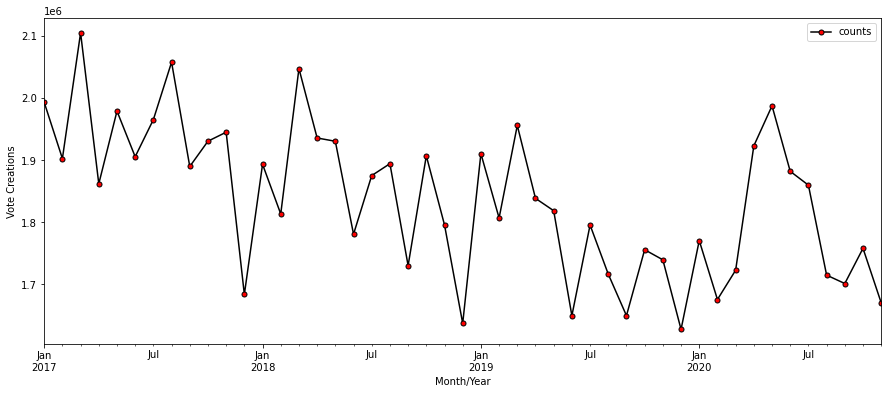

In [10]:
yearly_monthly_votes.plot(x='CreateYearMonth',y='counts',figsize=(15,6),linestyle='-',
                         marker='.', markerfacecolor='r',color='black',markersize=10)
# plt.rcParams.update({'font.size': 12})
plt.xlabel('Month/Year')
plt.ylabel('Vote Creations')